# Creating Histograms of Well Log Data

## Introduction

They are a commonly used tool within petrophysics for understanding the spread and distribution of data, and for picking key interpretation parameters such as shale or clay volume minimum and maximum values. Here, histograms from one of the Maui Wells will be displyed.

## Importing Libraries and Loading LAS Data
The first stage of any python project or notebook is generally to import the required libraries. In this case we are going to be using `lasio` to load our las file, `pandas` for storing our well log data, and `matplotlib` for visualising our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio

The data I am are using for this project is from the open source New Zealand Petroleum Data

In [36]:
las = lasio.read("/Users/isaacabrahamodeh/Desktop/Taranaki-wells/Taranaki/maui-5_final.las")

Only engine='normal' can read wrapped files


We then convert the las file to a pandas dataframe object.

In [37]:
df = las.df()

Using the `.describe()` method we can explore the summary statistics of the data.

In [38]:
df.describe()

,BS,CALI,DENS,DRHO,DTC,GR,NEUT,PEF,RESD,RESM,RESS,SP,TEMP,TENS
count,20282.000000,19702.000000,17815.000000,18048.000000,17877.000000,19570.000000,17910.000000,17983.000000,19743.000000,7287.000000,19856.000000,19660.000000,18124.000000,19820.000000
mean,12.704653,11.911560,2.302714,0.007695,100.573606,74.004321,0.325053,3.043811,2.300190,117.153885,2.763216,143.657409,64.176929,901.426358
std,5.753629,3.050788,0.182384,0.027072,26.265068,14.285335,0.090856,0.398776,1.694238,462.142640,5.191183,55.663880,18.330431,296.195610
min,8.500000,8.078100,1.281700,-0.044130,52.053100,33.044700,0.029080,1.541800,0.625700,0.748700,0.635800,26.595000,39.086900,349.110300
25%,8.500000,9.218800,2.166400,-0.009550,80.222700,65.478700,0.261665,2.836850,1.180300,2.061000,1.370675,104.561200,47.909450,627.088650
50%,12.250000,11.992700,2.304800,0.001480,93.392300,73.359650,0.330030,3.039000,1.616300,3.440200,1.782650,118.728450,60.896500,932.928850
75%,12.250000,12.815300,2.457450,0.013980,118.042600,80.341175,0.396870,3.242400,2.950550,5.541400,3.422100,165.182175,79.960875,1173.633050
max,36.000000,22.531300,2.834600,0.262390,331.500000,160.778000,0.586030,5.955700,22.775900,2000.000000,356.268600,299.762100,98.125000,1457.690400


## Creating Histograms Using pandas

Creating a quick histogram using pandas.

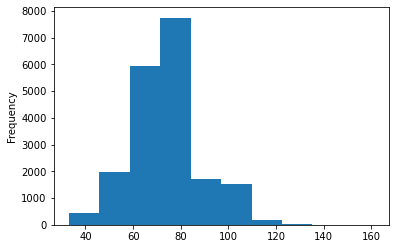

In [39]:
df['GR'].plot(kind='hist')
plt.show()

## Creating Histograms Using matplotlib
Creating a quick histogram using matplotlib like so.

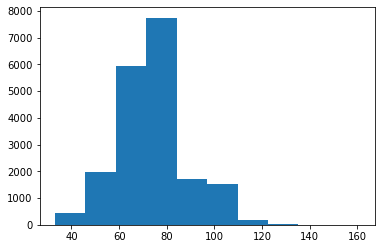

In [40]:
plt.hist(df['GR'])
plt.show()

This generates a very minimal plot. We can see that the values range from around 0 to 150, with a very small piece of data at 250 API. Each bin is around 25 API wide, which is quite a large range.

We can control this by specifying a set number for the bins argument, in this example we will set it to 30.

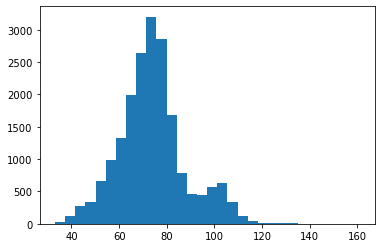

In [41]:
plt.hist(df['GR'], bins=30)
plt.show()

Let's tidy the plot up a little by adding edge colours to the bins.

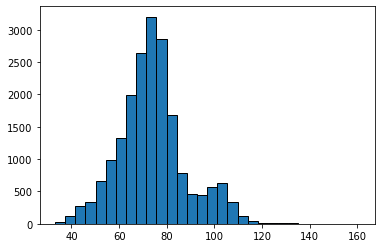

In [42]:
plt.hist(df['GR'], bins=30, edgecolor='black')
plt.show()

When we do this, we can see that the bins just below 100 API, is in fact two separate bins. 

To tidy the plot up further, we can assign both an x and y label, and also set the x-axis limits.

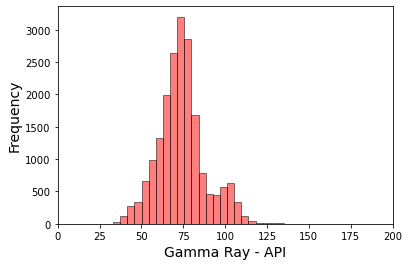

In [43]:
plt.hist(df['GR'], bins=30, color='red', alpha=0.5, edgecolor='black')
plt.xlabel('Gamma Ray - API', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0,200)

plt.savefig('histogram.png', dpi=300)

plt.show()

In addition to the bars, we can also add in a kernel density estimation, which provides us with a line illustrating the distribution of the data.

(0.0, 200.0)

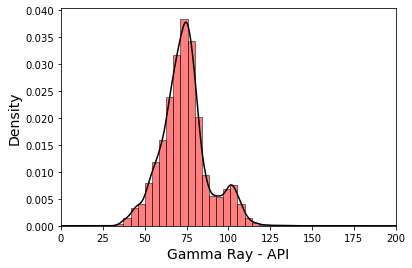

In [44]:
df['GR'].plot(kind='hist', bins=30, color='red', alpha=0.5, density=True, edgecolor='black')
df['GR'].plot(kind='kde', color='black')
plt.xlabel('Gamma Ray - API', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xlim(0,200)

When calculating clay and shale volumes we often use the percentiles as our interpretation parameters. 

These can be calculated using built in pandas functions: `mean()` and `quantile()`.

In [45]:
mean = df['GR'].mean()
p5 = df['GR'].quantile(0.05)
p95 = df['GR'].quantile(0.95)

print(f'Mean: \t {mean}')
print(f'P05: \t {p5}')
print(f'P95: \t {p95}')


Mean: 	 74.00432105774149
P05: 	 51.781369999999995
P95: 	 102.41258499999999


To get an idea of where these points fall in relation to our data, we can add them onto the plot using axvline and passing in the calculated variables, a colour and a label.

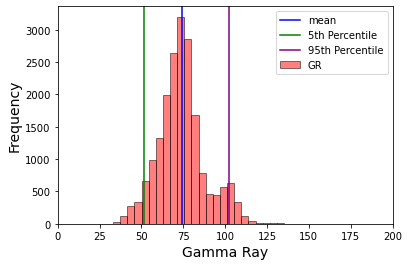

In [46]:
df['GR'].plot(kind='hist', bins=30, color='red', alpha=0.5, edgecolor='black')
plt.xlabel('Gamma Ray', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0,200)

plt.axvline(mean, color='blue', label='mean')
plt.axvline(p5, color='green', label='5th Percentile')
plt.axvline(p95, color='purple', label='95th Percentile')

plt.legend()
plt.show()
